In [1]:
import os
os.chdir('../../')

import pandas as pd
import matplotlib.pyplot as plt
from lib.transform.decompose import SSA
from lib.transform.impute import SSAImputer

import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv('data/airpassengers_missing_values.csv',
                 skipfooter=3,
                 engine='python')
df.head(20)

,Month,#Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
5,1949-06,135.0
6,1949-07,148.0
7,1949-08,148.0
8,1949-09,136.0
9,1949-10,119.0


### SSA

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:root:>>> [SSA] suggestion: use 4/12 eigenvector(s) (99.67%)
INFO:root:>>> [SSA] decomposition of '#Passengers' into 4 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] grouping done! [[0], [1, 2, 3]]
INFO:root:>>> [SSA] fit done! (0.022s)


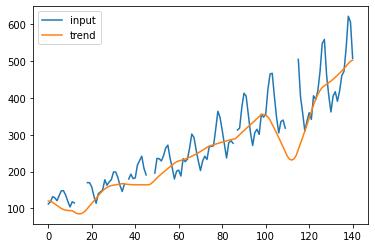

In [4]:
ssa = SSA("#Passengers", embedding_dimension=12, n_components=2)

df_ssa = ssa.fit_transform(df)

plt.plot(df_ssa["#Passengers"], label="input")
plt.plot(df_ssa["#Passengers_ssa1"], label="trend")
plt.legend()

### SSA imputation

In [32]:
ssai = SSAImputer(
    "#Passengers",
    embedding_dimension=12,
    var_threshold=99.9,
    n_components=2,
    grouping_method=None,
    use_k_components=2,
)

dfi = ssai.fit_transform(df, max_iter=100)

INFO:root:>>> [SSA imputer] requested to use 2/2 SSA components
INFO:root:>>> [SSA] suggestion: use 7/12 eigenvector(s) (99.92%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.003s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvect

INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.003s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: u

INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: u

INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: u

INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.004s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.003s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.003s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INF

INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.003s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INF

INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.003s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.003s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INF

INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INFO:root:>>> [SSA] fit done! (0.002s)
INFO:root:>>> [SSA] suggestion: use 8/12 eigenvector(s) (99.9%)
INFO:root:>>> [SSA] no grouping requested: subspace dimension is forced to 2/12
INFO:root:>>> [SSA] decomposition of '#Passengers' into 2 components
INFO:root:>>>    | embedding dimension: 12
INF

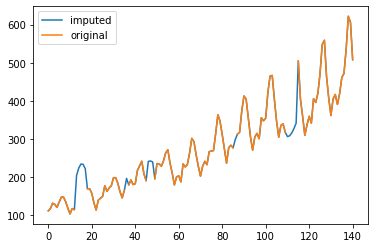

In [33]:
plt.plot(dfi["#Passengers"], label="imputed")
plt.plot(df["#Passengers"], label="original")
plt.legend()